In [3]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

## Get the data

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-02-09 21:56:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   147MB/s    in 1.0s    

2021-02-09 21:56:31 (147 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [20]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-02-10 01:28:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  54.2MB/s    in 0.2s    

2021-02-10 01:28:35 (54.2 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [4]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [21]:
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [5]:
# Directory with out training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with out training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [23]:
# Directory with our validation horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [19]:
# Examples
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse15-9.png', 'horse30-0.png', 'horse46-6.png', 'horse28-3.png', 'horse33-2.png', 'horse14-8.png', 'horse24-8.png', 'horse48-7.png', 'horse49-0.png', 'horse27-1.png']
['human11-07.png', 'human06-02.png', 'human03-13.png', 'human15-05.png', 'human12-22.png', 'human06-08.png', 'human07-08.png', 'human12-05.png', 'human15-30.png', 'human15-06.png']


In [24]:
validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse1-105.png', 'horse3-217.png', 'horse3-011.png', 'horse6-544.png', 'horse1-455.png', 'horse3-416.png', 'horse2-368.png', 'horse5-002.png', 'horse4-588.png', 'horse3-099.png']
['valhuman01-14.png', 'valhuman03-08.png', 'valhuman04-20.png', 'valhuman01-02.png', 'valhuman05-04.png', 'valhuman03-00.png', 'valhuman04-07.png', 'valhuman02-00.png', 'valhuman05-06.png', 'valhuman04-12.png']


In [7]:
print('Total training horse images:', len(os.listdir(train_horse_dir)))
print('Total training human images:', len(os.listdir(train_human_dir)))

Total training horse images: 500
Total training human images: 527


In [25]:
print('Total validation horse images:', len(os.listdir(validation_horse_dir)))
print('Total validation human images:', len(os.listdir(validation_human_dir)))

Total validation horse images: 128
Total validation human images: 128


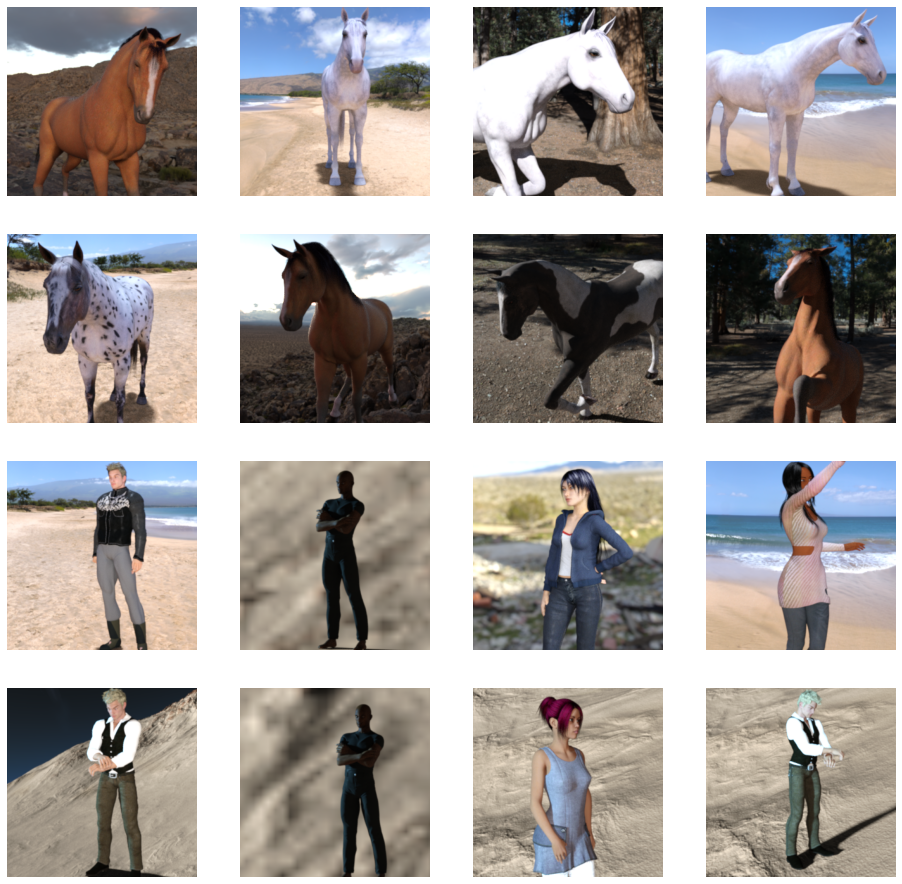

In [8]:
# Plot some images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Build Model

In [26]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)), #150, 150, 3
                                    tf.keras.layers.MaxPool2D(2, 2),

                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300, 300), # could compat to 150*150
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size=(300, 300), # 150 * 150
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [33]:
history = model.fit(train_generator, 
                    steps_per_epoch=8, 
                    epochs=15, 
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=8)

Epoch 1/15
8/8 [==============================] - 75s 9s/step - loss: 1.0966 - accuracy: 0.8142 - val_loss: 0.4119 - val_accuracy: 0.8594
Epoch 2/15
8/8 [==============================] - 74s 9s/step - loss: 0.2760 - accuracy: 0.8832 - val_loss: 0.8535 - val_accuracy: 0.8438
Epoch 3/15
8/8 [==============================] - 82s 10s/step - loss: 0.1883 - accuracy: 0.9238 - val_loss: 1.4777 - val_accuracy: 0.7969
Epoch 4/15
8/8 [==============================] - 74s 9s/step - loss: 0.1719 - accuracy: 0.9366 - val_loss: 0.4693 - val_accuracy: 0.8867
Epoch 5/15
8/8 [==============================] - 74s 9s/step - loss: 0.0873 - accuracy: 0.9622 - val_loss: 1.0308 - val_accuracy: 0.8438
Epoch 6/15
8/8 [==============================] - 73s 9s/step - loss: 0.1039 - accuracy: 0.9622 - val_loss: 1.3665 - val_accuracy: 0.8125
Epoch 7/15
8/8 [==============================] - 73s 9s/step - loss: 0.1719 - accuracy: 0.9199 - val_loss: 0.7155 - val_accuracy: 0.8477
Epoch 8/15
8/8 [=================

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse-561221_1920.jpg to horse-561221_1920.jpg
[4.3085706e-14]
horse-561221_1920.jpg is a horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


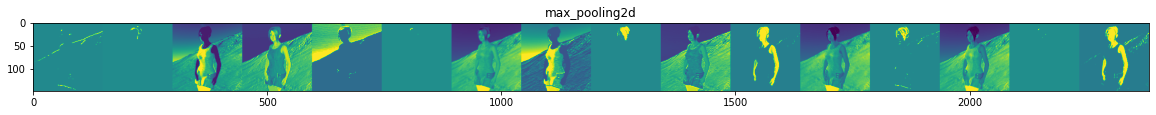

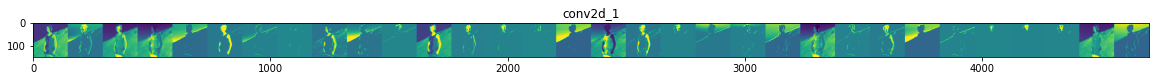

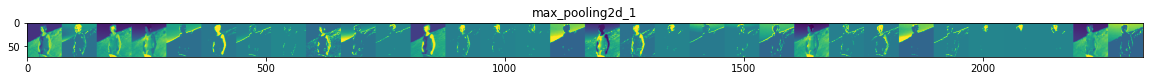

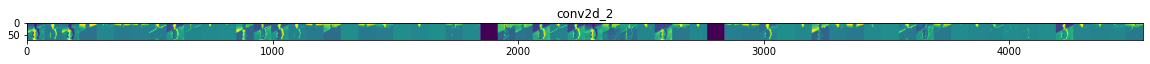

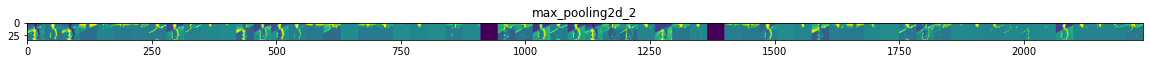

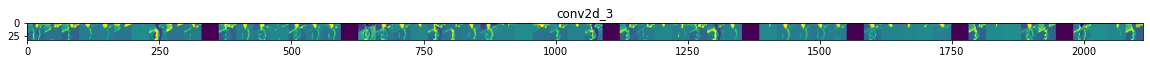

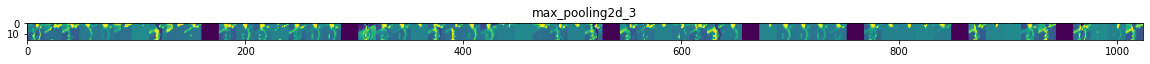

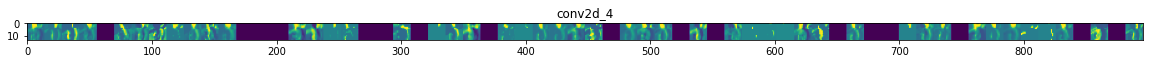

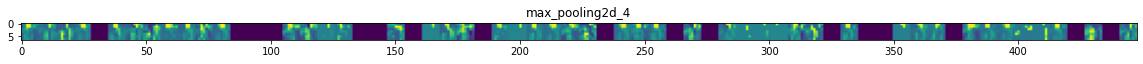

In [18]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')